### Imports

In [1]:
import numpy as np 
from scipy.sparse import csr_matrix 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve, recall_score, det_curve

In [2]:
import ce.cp_and_calibration as cp 

### Config

In [3]:
eps=0.05
population_size = 100

### Functions

In [4]:
def gen_data(variance, shift=0, scale=1, random_seed=42, mean_neg=.4, mean_pos=.6): 

    np.random.seed(random_seed)
    preds_neg=np.clip(
        (np.random.normal(mean_neg,variance,population_size)/(scale))-shift
        ,0.0001
        ,1
    )
    preds_pos=np.clip(
        (np.random.normal(mean_pos,variance,population_size)/(1/scale))-shift
        ,0.0001
        ,1
    )

    
    neg_labels = np.array([-1]*population_size)
    pos_labels = np.array([1]*population_size)

    preds_fva_dict = csr_matrix(np.hstack([preds_pos,preds_neg])).T
    labels_fva_dict = csr_matrix(np.hstack([pos_labels,neg_labels])).T
    ncms_fva_fit_dict, labels_fva_fit_dict = cp.fit_cp(
        preds_fva_dict
        ,labels_fva_dict
             )

    cp_test, alpha_threshold_neg, alpha_threshold_pos = cp.apply_cp(
        preds_fva_dict
        ,labels_fva_fit_dict
        ,ncms_fva_fit_dict
        ,eps
    )
    
    df_out = cp.eval_cp(
        cp_test,
        labels_fva_fit_dict,
    ) 

    labels_sorted = np.array(labels_fva_fit_dict['0'])[np.argsort(preds_fva_dict.toarray().flatten())]

    preds_sorted = sorted(preds_fva_dict.toarray().flatten())

    _, tnr, threshold_n = precision_recall_curve(
        np.where(labels_sorted==0,1,0),
        1-np.array(preds_sorted)
    )
    
    fpr, fnr, thresholds_det_n = det_curve(
        labels_sorted,
        preds_sorted
    )
    
    
    return df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos

In [5]:
def vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos): 
    
    fig, ax1 = plt.subplots()


    ax1.plot(
        thresholds_det_n,
        1-fnr,    
        c='blue',
        label='recall'
    )
    ax1.plot(
        thresholds_det_n,
        1-fpr,
        c='red',
        label='specificity'
    )

    _ = ax1.plot(
        (alpha_threshold_neg[0],alpha_threshold_neg[0]),
        (0,1),
        c='red',
        ls='--'
                )

    _ = ax1.plot(
        (-1*alpha_threshold_pos[0],-1*alpha_threshold_pos[0]),
        (0,1),
        c='blue',
        ls='--'
                )

    _ = ax1.plot(
        (0,1),
        (.95,.95),
        c='black',
        ls='--'
    )

    _ = ax1.text(.7,.7,'efficiency= {}'.format(df_out.efficiency_overall.item()))
    
    _ = ax1.text(-.1,.925,r'$1-\epsilon$')

    _ = ax1.set_ylim([0,1])
    _ = ax1.set_xlim([0,1])

    _ = ax1.legend()

    ax2 = ax1.twinx()

    _ = ax2.hist(preds_pos, color='blue', alpha=0.2)
    _ = ax2.hist(preds_neg, color='red', alpha=0.2)

    _ = ax2.legend([
        'probabilities actives'
        ,'probabilities inactives'

    ])

    _ = ax1.set_xlabel('Predictive probability')
    _ = ax1.set_ylabel('Predictive probability')
    _ = ax2.set_ylabel('Count')

### Empirical exploration

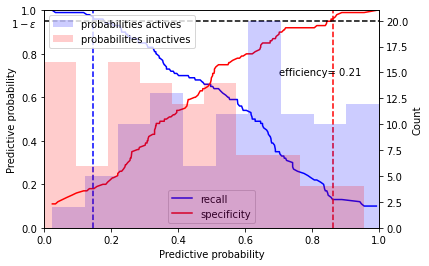

In [6]:
var = .3
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

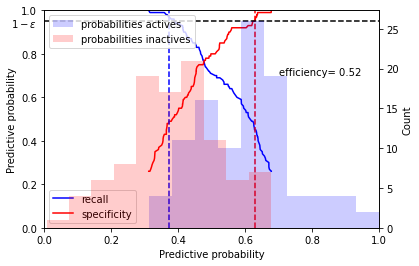

In [7]:
var = .15
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

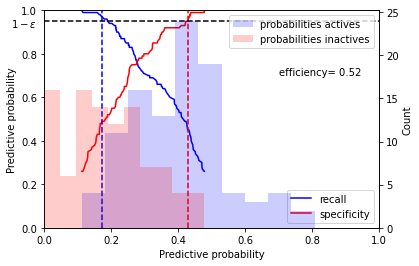

In [8]:
var = .15
shift = .2
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var,shift=shift)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

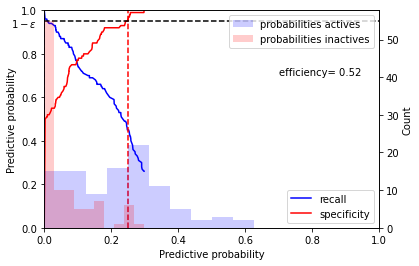

In [9]:
var = .15
shift = .38
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var,shift=shift)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

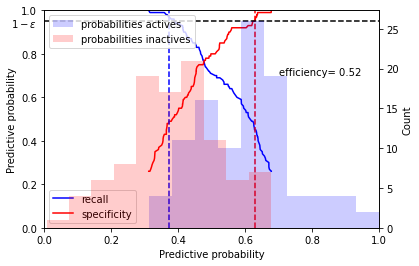

In [10]:
var = .15
shift = 0
scale = 1
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var,shift=shift,scale=scale)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

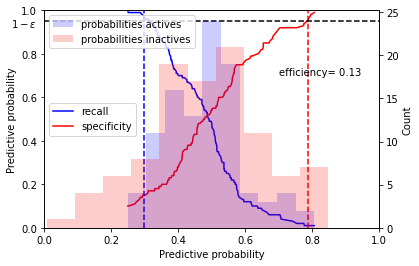

In [11]:
var = .15
shift = 0
scale = .8
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var,shift=shift,scale=scale)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)

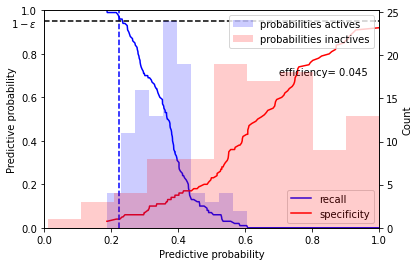

In [12]:
var = .15
shift = 0
scale = .6
df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos = gen_data(var,shift=shift,scale=scale)
vizualize(df_out, fpr, fnr, thresholds_det_n, preds_pos, preds_neg, alpha_threshold_neg, alpha_threshold_pos)